In [1]:
%load_ext autoreload
%autoreload 2
from spyglass.spikesorting import CuratedSpikeSorting
from spyglass.common import Session
import os
os.chdir('/home/sambray/Documents/MS_analysis_samsplaying/')
from spiking_analysis_tables import BinnedSpiking, BinnedSpikingParams, BinnedSpikingSelection

import numpy as np
from tqdm import tqdm

[2023-10-31 08:13:37,948][INFO]: Connecting sambray@lmf-db.cin.ucsf.edu:3306
[2023-10-31 08:13:37,979][INFO]: Connected sambray@lmf-db.cin.ucsf.edu:3306
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/spikeinterface/sortingcomponents/peak_detection.py:643: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(parallel=False)
/home/sambray/mambaforge-pypy3/envs/spyglass/lib/python3.9/site-packages/spikeinterface/sortingcomponents/peak_detection.py:668: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to Tru

In [3]:
BinnedSpikingParams()
BinnedSpikingParams.insert_default()
BinnedSpikingParams()
BinnedSpikingSelection()#.delete()
# BinnedSpiking()


binned_spike_params_name Name of the binned spike params,curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name
default,1,Totoro20220603_.nwb,0,01_sleep,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_01_sleep_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,0,03_sleep,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_03_sleep_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,0,04_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_04_lineartrack_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,0,09_sleep,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_09_sleep_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,0,10_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_10_lineartrack_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,0,14_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_14_lineartrack_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,0,15_sleep,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_15_sleep_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,1,10_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_10_lineartrack_1_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,2,10_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_10_lineartrack_2_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times
default,1,Totoro20220603_.nwb,3,10_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Totoro20220603_.nwb_10_lineartrack_3_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times


In [31]:
animal = "Wallie"
binned_spike_params_name = 'default'

for animal in ['Winnie','Frodo','Bilbo',"Olive","Banner","Odins","Wallie","Yoshi","Totoro","Winnie"]:
    session_list = (Session & {'subject_id': animal}).fetch('nwb_file_name',)
    for nwb_file_name in session_list:
        key = {'nwb_file_name': nwb_file_name}
        sort_group_list = list(set((CuratedSpikeSorting & key).fetch('sort_group_id')))
        for sort_group in sort_group_list:
            key= {'nwb_file_name': nwb_file_name,'sort_group_id':sort_group}
            sort_interval_list = list(set((CuratedSpikeSorting & key).fetch('sort_interval_name')))
            for sort_interval_name in tqdm(sort_interval_list):
                key= {'nwb_file_name': nwb_file_name,'sort_group_id':sort_group,'sort_interval_name':sort_interval_name}
                if not CuratedSpikeSorting & key:
                    print('skip ',key)
                    continue
                cur_id = np.max((CuratedSpikeSorting & key).fetch('curation_id'))
                key['curation_id'] = cur_id
                ss_key = (CuratedSpikeSorting & key).fetch1('KEY')
                ss_key["binned_spike_params_name"] = binned_spike_params_name
                BinnedSpikingSelection.insert1(ss_key,skip_duplicates=True)
                BinnedSpiking.populate(ss_key)
        
    
#     # print(nwb_file_name)
#     continue
# CuratedSpikeSorting & {"nwb_file_name": nwb_file_name}

[2023-10-31 09:00:10,385][WARNING]: MySQL server has gone away. Reconnecting to the server.
100%|██████████| 15/15 [00:02<00:00,  6.39it/s]


In [27]:
key = {'nwb_file_name': 'Bilbo20230724_.nwb',}# 'sort_interval_name': '04_lineartrack'}
sort_group_list = set((CuratedSpikeSorting & key).fetch('sort_group_id'))
for sort_group in sort_group_list:
    key['sort_group_id'] = sort_group
    sort_interval_list = list(set((CuratedSpikeSorting & key).fetch('sort_interval_name')))
    # break
sort_interval_list
for sort_interval_name in tqdm(sort_interval_list):
    key['sort_interval_name'] = sort_interval_name
    # break
key
# sort_interval_list
bool(CuratedSpikeSorting & key)
cur_id = np.max((CuratedSpikeSorting & key).fetch('curation_id'))
key['curation_id'] = cur_id
CuratedSpikeSorting & key
ss_key = (CuratedSpikeSorting & key).fetch1('KEY')
ss_key["binned_spike_params_name"] = binned_spike_params_name
BinnedSpikingSelection.insert1(ss_key,skip_duplicates=True)
BinnedSpiking.populate(ss_key)

100%|██████████| 13/13 [00:00<00:00, 112193.32it/s]


In [28]:
# (CuratedSpikeSorting & ss_key).fetch_nwb()[0]['units']
# (BinnedSpiking() & ss_key).mark_alligned_binned_spikes(key, [1000,], [-1,1])
BinnedSpiking() & ss_key

binned_spike_params_name Name of the binned spike params,curation_id a number correponding to the index of this curation,nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,sort_interval_name name for this interval,preproc_params_name,team_name,sorter,sorter_params_name,artifact_removed_interval_list_name,binned_spiking,time_bins
default,5,Bilbo20230724_.nwb,12,10_lineartrack,franklab_tetrode_hippocampus,ms_stim,mountainsort4,franklab_tetrode_hippocampus_30KHz_tmp,Bilbo20230724_.nwb_10_lineartrack_12_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times,=BLOB=,=BLOB=


In [32]:
(BinnedSpiking() & ss_key).fetch('binned_spiking')

mark = (BinnedSpiking & ss_key).fetch1('time_bins')[10000]
x=(BinnedSpiking() & ss_key).mark_alligned_binned_spikes(ss_key, [mark,mark+10], [-1,100])
x

array([[[0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0]]])

In [31]:
x.shape

(2, 1, 50496)

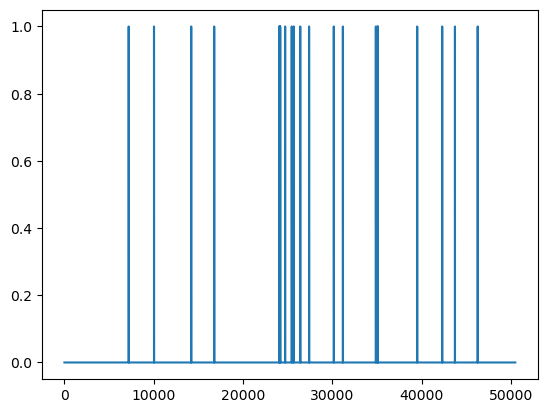

In [24]:
import matplotlib.pyplot as plt
plt.plot(x[0,0])

In [4]:
key_list = (BinnedSpiking()).fetch('KEY')

for ss_key in key_list:
    if (BinnedSpiking & ss_key).fetch('binned_spiking').size>0:
        break

In [28]:
BinnedSpiking().get_current_curation_key_list({'nwb_file_name': 'Wallie20220911_.nwb',
  'sort_interval_name': '02_lineartrack',})

[{'binned_spike_params_name': 'default',
  'curation_id': 31,
  'nwb_file_name': 'Wallie20220911_.nwb',
  'sort_group_id': 0,
  'sort_interval_name': '02_lineartrack',
  'preproc_params_name': 'franklab_tetrode_hippocampus',
  'team_name': 'ms_stim',
  'sorter': 'mountainsort4',
  'sorter_params_name': 'franklab_tetrode_hippocampus_30KHz_tmp',
  'artifact_removed_interval_list_name': 'Wallie20220911_.nwb_02_lineartrack_0_franklab_tetrode_hippocampus_ampl_2000_prop_75_artifact_removed_valid_times'}]